In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# ******************* Overview of data. & Combine Training set and Test set **********************
# Training set and test set is combined together to make feature engeneering, 
#  after data is cleaned and new features set up, then split them.

In [91]:
data_train=pd.read_csv('./train.csv',delimiter=",")     # load in training data
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [92]:
data_train.shape

(891, 12)

In [93]:
data_test=pd.read_csv('./test.csv',delimiter=",")            # load in test data
data_test.insert(loc=2, column='Survived', value=-1)      # assign -1 to "Survived" for samples that need to be predicted
data_test.tail()

,PassengerId,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,-1,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,-1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,-1,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,-1,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,-1,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [94]:
data_test.shape

(418, 12)

In [95]:
frames = [data_train, data_test]                         # combine training data & test data together ----  make it easier for feature engineering
data = pd.concat(frames, sort = False)
data.shape

(1309, 12)

In [96]:
#. ********************************. Checking NA ************************************

In [97]:
data=data.fillna(np.nan)
print(data.isna().sum())  

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [98]:
# ***************************** filling NA for "Fare" ***************************************

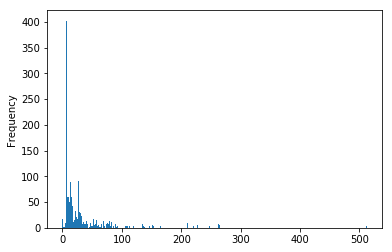

In [99]:
plt.figure()
data['Fare'].plot.hist(bins=300)

In [100]:
mean = data["Fare"].mean()        # calculate the mean of "Fare"
mean

33.2954792813456

In [101]:
median = data["Fare"].median()    # calculate the median of "Fare", the gragh is highly skewed, so here we replace NaN with median
median

14.4542

In [102]:
data["Fare"].replace(np.nan, median, inplace = True)
print(data.isna().sum())  

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64


In [103]:
# *********************** Filling NA for "Embarked"  **********************************************

In [104]:
data["Embarked"].replace(np.nan, "S", inplace = True)     # Replace the NaN with "S" for "Embarked"
print(data.isna().sum())  

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


In [105]:
# ******************** Create a new feature containing the title *************************

In [106]:
line=data.shape[0]
Title=[]
Familly_Name=[]
First_Name=[]
Married_Woman=[]
name = ' '
for i in range(line):
    name=data.iat[i,3]     # get "Name"
    key=name.split(",")
    inter=key[1]            # separate coma:  familly name "," Title "." First Name "(" Before wedding name or if "(" " nickname
    Familly_Name.append(key[0])
    key2= inter.split(".")
    Title.append(key2[0])
    key3=key2[1].split("(")
    First_Name.append(key3[0])
    #print(key3)
    if len(key3)>1:
        #print(key3[1][0])
        if key3[1][0]!='"':
            Married_Woman.append(1)
        else:
            Married_Woman.append(0)
    else:
        Married_Woman.append(0)
data['Title']=Title
data['First_Name']=First_Name
data['Familly_name']=Familly_Name
data['Married_Woman']=Married_Woman
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,First_Name,Familly_name,Married_Woman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath,Futrelle,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen,0


In [107]:
# ********************** Transfrom "Age" from exact number -> age group  ************************************

In [108]:
data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

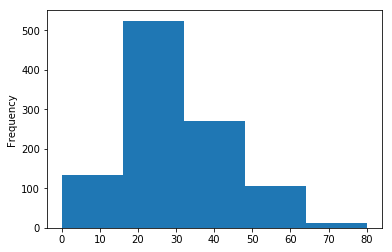

In [109]:

plt.figure()
data['Age'].plot.hist(bins=5)

In [110]:
line=data.shape[0]
class_age=[]
# class 0 : x<19 ans
# class 1 : 19<= x < 35
# class 2 : 35<= x <50
# class 3 : 50<= x <65
# class 4 : 65<=x
for i in range(line):
    age=data.iat[i,5]     # 'Age'
    if   age <19 and age>=0:
        class_age.append(0)
    elif (age<35 and age>= 19):
        class_age.append(1)
    elif (age<50 and age>=35):
        class_age.append(2)
    elif (age<65 and age>=50):
        class_age.append(3)
    elif (age>=65 and age<=100):
        class_age.append(4)
    else:
        class_age.append(-1)
        
data['Age_Classe']=class_age



In [111]:
# *************** Transform Categorical variables to dummy variables *******************************

In [112]:
data = pd.get_dummies(data, columns=['Sex','Title','Embarked'], drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,1,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,0,1,0,0,0,0,0,0,1


In [113]:
# ********************* Create new feature of "Companion"  *************************************

In [114]:
Companion=[]

for p in range(line):
    count=0
    ticket_p=data.iat[p,8]    # "ticket"
    for l in range(line):
        ticket_l=data.iat[l,8]
        if ticket_l==ticket_p:
            count=count+1
    compa=count-1 #remove the personstself
    Companion.append(compa)
    
data['Companion']=Companion
data.head()
#data['Companion'].value_counts()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,Embarked_Q,Embarked_S,Companion
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,0,0,0,0,0,1,17
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,1,0,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,0,0,0,1,5
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,1,0,0,0,0,0,0,1,59
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,...,0,1,0,0,0,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,...,0,1,0,0,0,0,0,0,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,...,0,0,0,0,0,0,0,0,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,...,0,0,1,0,0,0,0,0,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,...,0,0,1,0,0,0,0,0,0,1


In [115]:
 print(data.isna().sum())     # check the availble variables 

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Age                     263
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                  1014
First_Name                0
Familly_name              0
Married_Woman             0
Age_Classe                0
Sex_male                  0
Title_ Col                0
Title_ Don                0
Title_ Dona               0
Title_ Dr                 0
Title_ Jonkheer           0
Title_ Lady               0
Title_ Major              0
Title_ Master             0
Title_ Miss               0
Title_ Mlle               0
Title_ Mme                0
Title_ Mr                 0
Title_ Mrs                0
Title_ Ms                 0
Title_ Rev                0
Title_ Sir                0
Title_ the Countess       0
Embarked_Q                0
Embarked_S                0
Companion                 0
dtype: int64


In [116]:
# *************** building models to predict "Age group"  for NA in age. *****************************

In [117]:
from sklearn import cross_validation
Data_ForAgeGroup=data[['Title_ Col','Title_ Don','Title_ Dona','Title_ Dr','Title_ Jonkheer','Title_ Lady','Title_ Major','Title_ Master','Title_ Miss','Title_ Mlle','Title_ Mme','Title_ Mr','Title_ Mrs','Title_ Ms','Title_ Rev','Title_ Sir','Title_ the Countess','Companion','Sex_male','Pclass','SibSp','Parch','Fare','Embarked_Q','Embarked_S','Married_Woman', 'Age_Classe']]

# data with age known
Data_ForAgeGroup_train=Data_ForAgeGroup.loc[Data_ForAgeGroup['Age_Classe']!=-1]
# separate labels and features
labels=Data_ForAgeGroup_train[['Age_Classe']]
Data_ForAgeGroup_train=Data_ForAgeGroup_train[['Title_ Col','Title_ Don','Title_ Dona','Title_ Dr','Title_ Jonkheer','Title_ Lady','Title_ Major','Title_ Master','Title_ Miss','Title_ Mlle','Title_ Mme','Title_ Mr','Title_ Mrs','Title_ Ms','Title_ Rev','Title_ Sir','Title_ the Countess','Companion','Sex_male','Pclass','SibSp','Parch','Fare','Embarked_Q','Embarked_S','Married_Woman']]


In [118]:
# LogisticRegression
# crosse - validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(Data_ForAgeGroup_train, labels)   # multi-classification
# clf.score(Xtest, ytest)   # prediction accuracy
scores = cross_val_score(clf, Data_ForAgeGroup_train, labels, cv=10)
scores

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.55140187, 0.64485981, 0.57009346, 0.5754717 , 0.58490566,
       0.59615385, 0.57281553, 0.54901961, 0.60784314, 0.62745098])

In [119]:
# Support Vector Machine
from sklearn.svm import SVC
clf = SVC(gamma='auto').fit(Data_ForAgeGroup_train, labels)     # C = 1 by default
scores = cross_val_score(clf, Data_ForAgeGroup_train, labels, cv=5)
scores

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.57819905, 0.55238095, 0.51196172, 0.5625    , 0.5625    ])

In [120]:
#  Decision Tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(Data_ForAgeGroup_train, labels)     
scores = cross_val_score(clf, Data_ForAgeGroup_train, labels, cv=5)
scores

array([0.507109  , 0.52857143, 0.55980861, 0.49519231, 0.61057692])

In [121]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(35,35,35),activation='tanh',max_iter=100000)
mlp.fit(Data_ForAgeGroup_train, labels)
scores = cross_val_score(mlp, Data_ForAgeGroup_train, labels, cv=5)
predict=mlp.predict(Data_ForAgeGroup_train)
predict
scores
#print(np.mean(scores))

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d arr

array([0.63033175, 0.55714286, 0.60287081, 0.55769231, 0.59134615])

In [123]:
Age_Classe_New=[]               # make prediction and replace NA with prediction

for p in range(line):
    age_classe=Data_ForAgeGroup.iat[p,26]
    if age_classe==-1:
        Age_Classe_New.append(int(mlp.predict(Data_ForAgeGroup.iloc[p:p+1,0:26])))
            
    else:
        Age_Classe_New.append(age_classe)
Age_Classe_New
Data_ForAgeGroup['Age_Classe_estimate']=Age_Classe_New
Data_ForAgeGroup.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


(1309, 28)

In [124]:
# ******************** Split training and test dataset ***********************

In [125]:
DataFinal = Data_ForAgeGroup.drop(columns=['Age_Classe'])
X_train = DataFinal.iloc[0:891,:]
y_train = data.iloc[0:891, 1]

X_prediction = DataFinal.iloc[891:,:]
y_prediction = data.iloc[891:, 1]


In [87]:
# **********************  Write data to CSV ***************************
X_train.to_csv("X_train_dummy.csv", index=False)
y_train.to_csv("y_train_dummy.csv", index=False)
X_prediction.to_csv("X_prediction_dummy.csv", index=False)
y_prediction.to_csv("y_prediction_dummy.csv", index=False)